#### Import Libraries

In [106]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from __future__ import print_function
from time import time
import logging
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#### Load the Labeled Faces in the Wild dataset
which consists off several thousand collated photos of various public figures

In [107]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


#### A quick visualisation of the data that we are working with

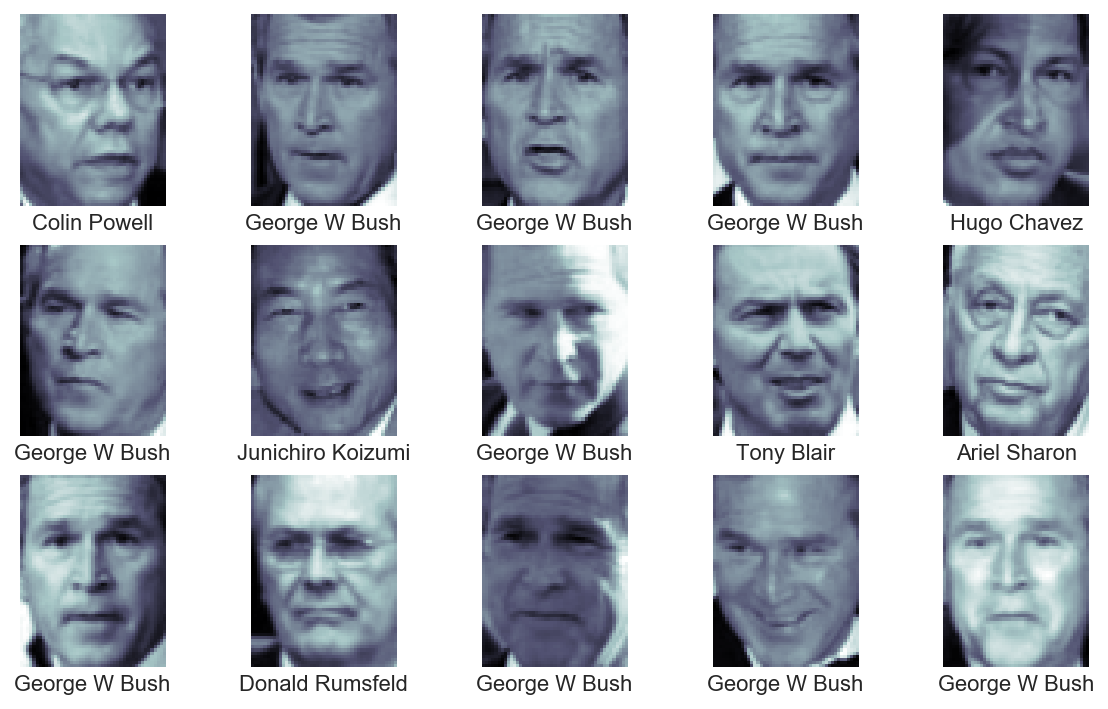

In [114]:
fig, ax = plt.subplots(3, 5, figsize=(10, 6) )
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
        xlabel=faces.target_names[faces.target[i]])

#### We pack the pre-processor(PCA) and the classifier into a pipeline

In [115]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca= PCA(n_components=150, whiten=True, random_state=42, svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

#### Split the datset into a training and test dataset

In [116]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
random_state=42)

#### We use a grid search cross-validation to explore combinations of parameters

In [117]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 30 s
{'svc__C': 10, 'svc__gamma': 0.001}


#### Once we have found the best parameters then we fit the SVM using the parameters

In [118]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

#### Test images with their predicted values

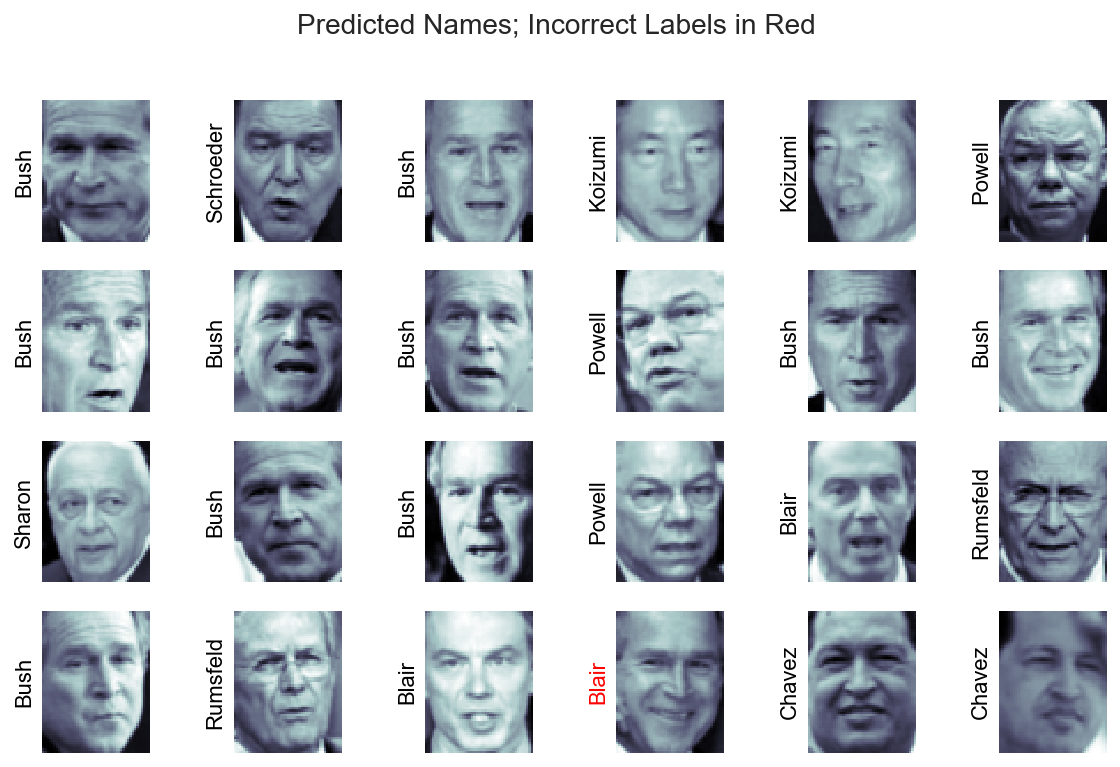

In [123]:
fig, ax = plt.subplots(4, 6, figsize=(10, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
        color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

####  Lets evaluate how well out estimators performed

In [62]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

      avg / total       0.86      0.85      0.85       337



#### Using the confuson matrix

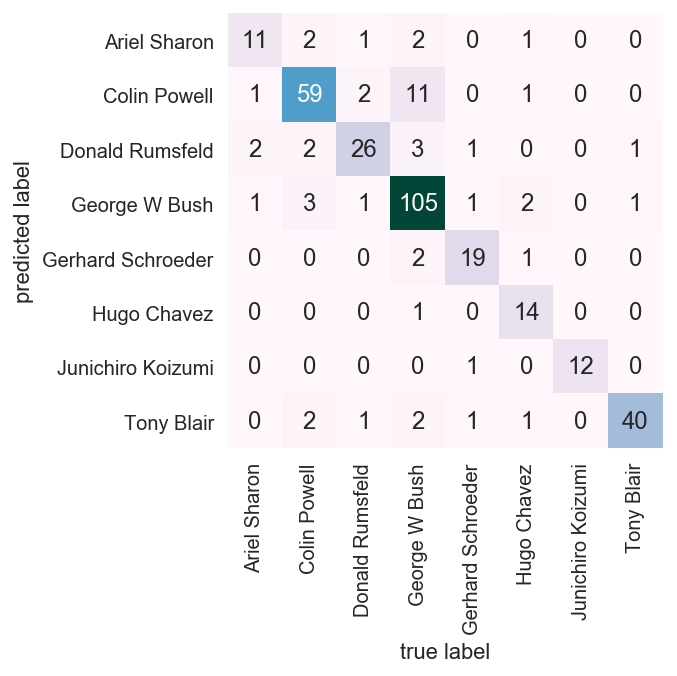

In [80]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="PuBuGn", cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');